# **Rede Vgg**

## **1- Importação de Biliotecas**

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np 
import pandas as pd 
from IPython.display import display, Image 
%matplotlib inline
import os

from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.image as mpimg
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model

import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from IPython.display import Image, display
import random, os

## **2- Instação do Kaggle**

In [ ]:
!pip install -q kaggle

## **3- Importação do Arquivo Json Kaggle**

In [ ]:
from google.colab import files

files.upload()

## **4- Criação pasta no drive arquivo kaggle**

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

## **5- Baixar o dataset direto do kaggle**

In [ ]:
! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.57G/3.58G [01:06<00:00, 80.0MB/s]
100% 3.58G/3.58G [01:06<00:00, 57.6MB/s]


## **6- Extrai arquivos Zip(dataset)**

In [ ]:
!unzip fruits-fresh-and-rotten-for-classification.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_b

## **7- Obtem os rotulos dos dados de treinamento**

In [ ]:
labels = os.listdir('/content/dataset/train')
labels

['rottenapples',
 'freshapples',
 'rottenbanana',
 'rottenoranges',
 'freshbanana',
 'freshoranges']

## **8- Mostra de forma aleatória algumas imagens de treinamento e tambem o tamanho de cada pasta de frutas de treinamento**


 ROTTENAPPLES


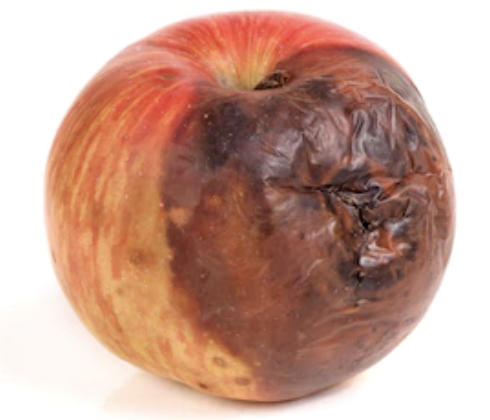

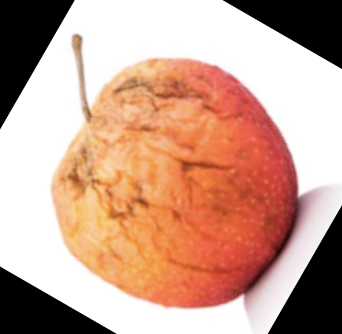

there are  2342  images in  rottenapples class

 FRESHAPPLES


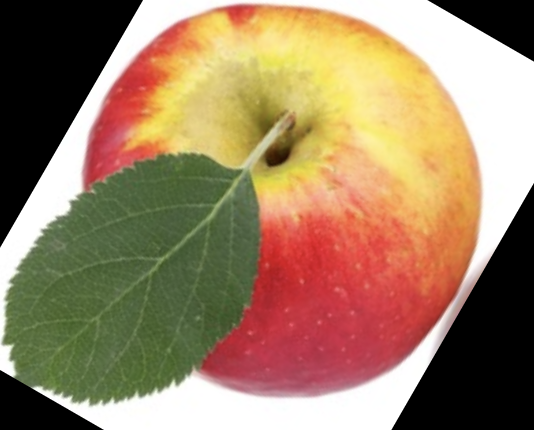

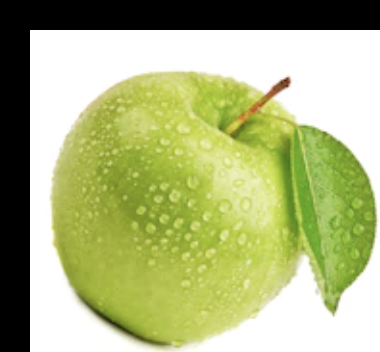

there are  1693  images in  freshapples class

 ROTTENBANANA


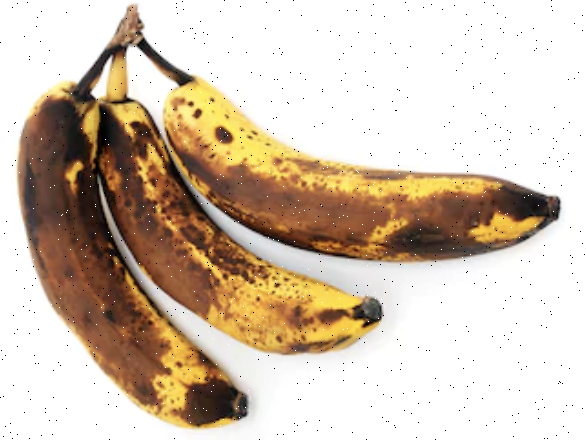

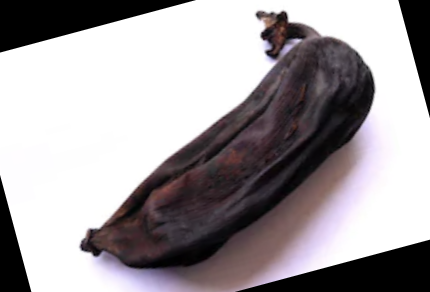

there are  2224  images in  rottenbanana class

 ROTTENORANGES


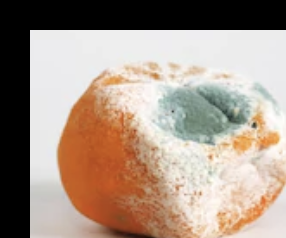

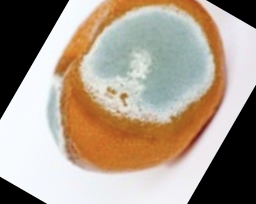

there are  1595  images in  rottenoranges class

 FRESHBANANA


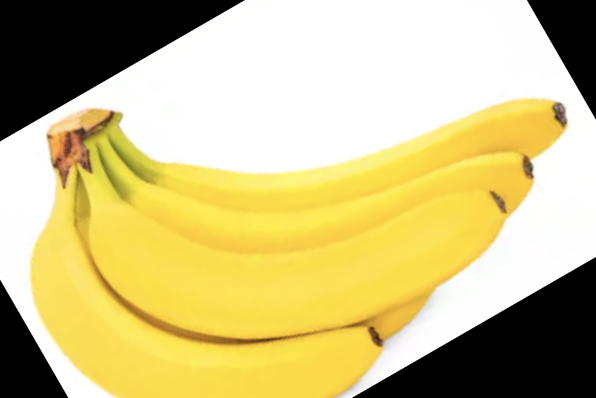

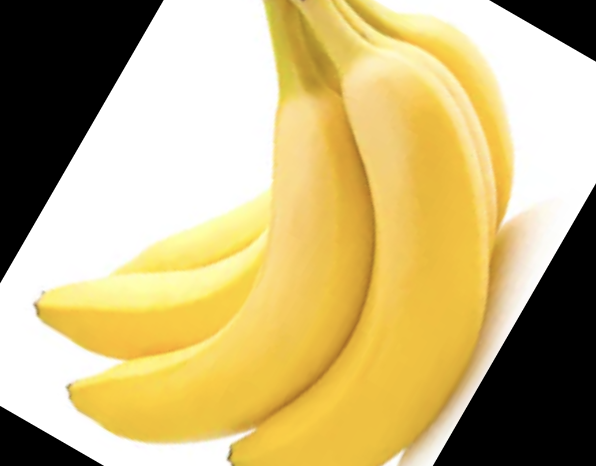

there are  1581  images in  freshbanana class

 FRESHORANGES


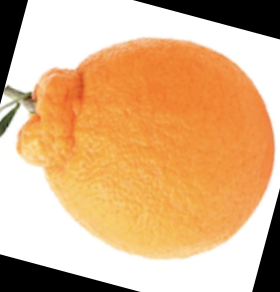

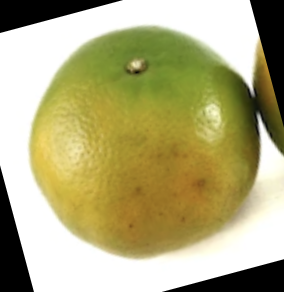

there are  1466  images in  freshoranges class


In [ ]:
num = []

for i in labels:
  path = '/content/dataset/train/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', i, 'class')

## **9-Divide os diretórios treinamento e validação(treino/teste)**

In [ ]:
train_dir = os.path.join('/content/dataset/train', 'train')
test_dir = os.path.join('/content/dataset/test', 'test')

## **10- Lista as classes do Treino**

In [ ]:
!ls /content/dataset/train

freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges


## **11-Verifica a quantidade de imagens do teste**

In [ ]:
test_imgs_count = sum([len(files) for r, d, files in os.walk("/content/dataset/test")])
test_imgs_count

2698

## **12-Verifica a quantidade de imagens do treino**

In [ ]:
train_imgs_count = sum([len(files) for r, d, files in os.walk("/content/dataset/train")])
train_imgs_count

10901

## **13- Tamanho do Lote**

In [ ]:
#modificar pra ver o resultado!!!
batch_size_train = 71
batch_size_test = 1

## **14- Verificar imagens**

In [ ]:
def display20randomimages(t):
  fig=plt.figure(figsize=(8, 8))
  columns = 4
  rows = 5
  for i in range(1, columns*rows +1):
    c = "/" + str(random.choice([0,1,2,3,4,5,6,7])) + "/"
    random_filename = random.choice([
        x for x in os.listdir(t + c)
        if os.path.isfile(os.path.join(t+c, x))
    ])
    img = mpimg.imread(t+c+random_filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
  plt.show()

## **15- Reescalona os dados de treino**

In [ ]:
train_datagen = ImageDataGenerator()


## **16- Reescalona os dados do teste**

In [ ]:
test_datagen = ImageDataGenerator()

## **17- Mostra dimensão das imagens**

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

## **18- Definição de dados de treino**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory=r'/content/dataset/train',
    target_size=(160, 160),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 10901 images belonging to 6 classes.


## **19- Definição de dados de teste**

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory=r'/content/dataset/test',
    target_size=(160, 160),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 2698 images belonging to 6 classes.


## **20- Definições**

In [ ]:
inp = Input(shape = (160,160,3))

In [ ]:
base_learning_rate = 0.0001

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

## **21- Importação da Vgg**

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

## **22- Carregamento da Vgg**

In [ ]:
model_vgg = VGG16(input_shape=(160,160,3), include_top=False, weights='imagenet')
model_vgg.trainable = False #conlega algumas camadas(só treina o topo da rede)

model_vgg.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
______________________________________________________________

## **23- Adiciona Algumas Camadas a Rede Vgg**

In [ ]:
x = preprocess_input(inp)
x1 = model_vgg(x, training=False)
x2 = GlobalAveragePooling2D()(x1)
x3 = Dropout(rate=0.5)(x2)
x4 = Dense(512, activation='relu')(x3)
x5 = Dense(128, activation='relu')(x4)
out = Dense(6, activation='softmax')(x5)

## **24- Compila Modelo Vgg com novas camadas**

In [ ]:
model_vgg = Model(inputs = inp, outputs = out)
model_vgg.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 160, 160, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 160, 160, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656

## **25- Otimizadores da Rede**

In [ ]:
model_vgg.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

## **26- Treina a Vgg**

In [ ]:
history = model_vgg.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=17,
                    validation_data=test_generator,
                    validation_steps=STEP_SIZE_TEST
)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/17
340/340 [==============================] - 113s 228ms/step - loss: 0.6214 - accuracy: 0.8471 - val_loss: 0.1030 - val_accuracy: 0.9628
Epoch 2/17
340/340 [==============================] - 73s 216ms/step - loss: 0.2517 - accuracy: 0.9134 - val_loss: 0.0801 - val_accuracy: 0.9740
Epoch 3/17
340/340 [==============================] - 73s 215ms/step - loss: 0.2022 - accuracy: 0.9254 - val_loss: 0.0570 - val_accuracy: 0.9833
Epoch 4/17
340/340 [==============================] - 73s 215ms/step - loss: 0.1741 - accuracy: 0.9392 - val_loss: 0.0521 - val_accuracy: 0.9840
Epoch 5/17
340/340 [==============================] - 73s 214ms/step - loss: 0.1464 - accuracy: 0.9478 - val_loss: 0.0453 - val_accuracy: 0.9833
Epoch 6/17
340/340 [==============================] - 73s 214ms/step - loss: 0.1387 - accuracy: 0.9521 - val_loss: 0.0401 - val_accuracy: 0.9900
Epoch 7/17
340/340 [==============================] - 73s 214ms/step - loss: 0.1322 - accuracy: 0.9537 - val_loss: 0.0336 - val_a

## **27- Treina Modelo Preditivo**

In [ ]:
predgen_vgg = model_vgg.predict_generator(test_generator, steps=len(test_generator), verbose=1) 
pred_vgg = np.argmax(predgen_vgg,axis = 1)
y_true=test_generator.classes

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


85/85 [==============================] - 14s 166ms/step


## **28-Matriz Confusão**

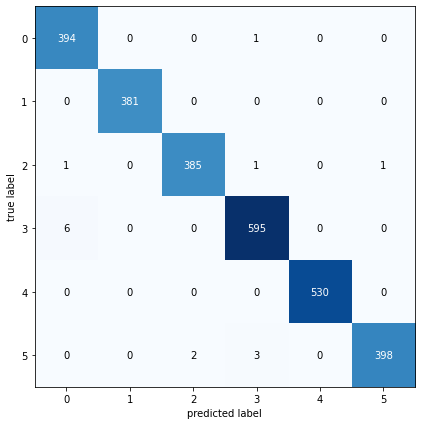

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, pred_vgg)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(15, 7))
plt.show()

## **29- Métricas**

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, pred_vgg)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, pred_vgg, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, pred_vgg, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, pred_vgg, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, pred_vgg, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, pred_vgg, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, pred_vgg, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, pred_vgg, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, pred_vgg, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, pred_vgg, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, pred_vgg))#, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4','Class 5']))


Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.99
Macro Recall: 0.99
Macro F1-score: 0.99

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

Classification Report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       395
           1       1.00      1.00      1.00       381
           2       0.99      0.99      0.99       388
           3       0.99      0.99      0.99       601
           4       1.00      1.00      1.00       530
           5       1.00      0.99      0.99       403

    accuracy                           0.99      2698
   macro avg       0.99      0.99      0.99      2698
weighted avg       0.99      0.99      0.99      2698



## **30- Avaliando (Loss=Perda)**

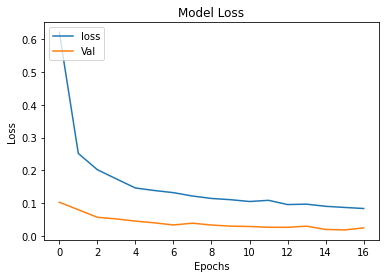

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

## **31- Avaliando (Acurácia=Acerto)**

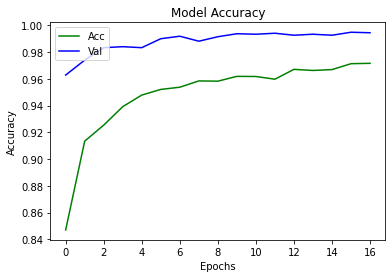

In [ ]:
plt.plot(history.history['accuracy'],'g')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

# **Rede ResNet**

## **32-Importaçao da ResNet**

In [ ]:
from keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from keras.preprocessing import image

## **33 - Carregamento da Resnet**

In [ ]:
model_resnet = ResNet50V2(input_shape=(160,160,3), include_top=False, weights='imagenet')
model_resnet.trainable = False #conlega algumas camadas(só treina o topo da rede)

model_resnet.summary()

94683136/94668760 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 82, 82, 64)   0           conv1_conv[0][0]                 
________________________

## **34 - Adiciona Camadas na rede ResNet**

In [ ]:
x = preprocess_input(inp)
x1 = model_resnet(x, training=False)
x2 = GlobalAveragePooling2D()(x1)
x3 = Dropout(rate=0.5)(x2)
x4 = Dense(512, activation='relu')(x3)
x5 = Dense(128, activation='relu')(x4)
out = Dense(6, activation='softmax')(x5)

##**35 - Compila Resnet com novas camadas**

In [ ]:
model_resnet = Model(inputs = inp, outputs = out)
model_resnet.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 5, 5, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049

## **36 - Otimiza a rede**

In [ ]:
model_resnet.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

## **37 - Treina a Rede**

In [ ]:
history = model_resnet.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=17,
                    validation_data=test_generator,
                    validation_steps=STEP_SIZE_TEST
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/17
340/340 [==============================] - 78s 215ms/step - loss: 0.2637 - accuracy: 0.9130 - val_loss: 0.1155 - val_accuracy: 0.9557
Epoch 2/17
340/340 [==============================] - 71s 207ms/step - loss: 0.1201 - accuracy: 0.9560 - val_loss: 0.0687 - val_accuracy: 0.9769
Epoch 3/17
340/340 [==============================] - 70s 206ms/step - loss: 0.0979 - accuracy: 0.9652 - val_loss: 0.0581 - val_accuracy: 0.9810
Epoch 4/17
340/340 [==============================] - 71s 207ms/step - loss: 0.0720 - accuracy: 0.9750 - val_loss: 0.0374 - val_accuracy: 0.9888
Epoch 5/17
340/340 [==============================] - 70s 207ms/step - loss: 0.0705 - accuracy: 0.9747 - val_loss: 0.0333 - val_accuracy: 0.9877
Epoch 6/17
340/340 [==============================] - 70s 206ms/step - loss: 0.0581 - accuracy: 0.9791 - val_loss: 0.0326 - val_accuracy: 0.9874
Epoch 7/17
340/340 [==============================] - 70s 206ms/step - loss: 0.0554 - accuracy: 0.9804 - val_loss: 0.0265 - val_ac

## **38 - Treina Modelo Preditivo ResNet**

In [ ]:
predgen_resnet = model_resnet.predict_generator(test_generator, steps=len(test_generator), verbose=1) 
pred_resnet = np.argmax(predgen_resnet,axis = 1)
y_true=test_generator.classes

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


85/85 [==============================] - 14s 155ms/step


## 39 - Matriz de Confusao Resnet 

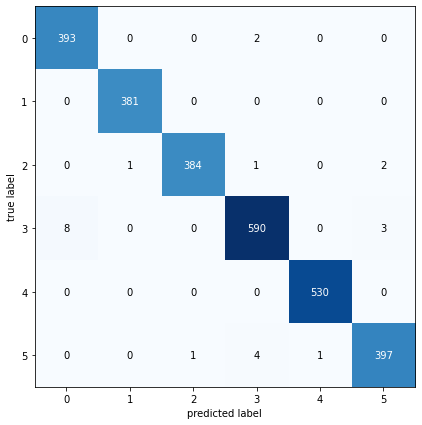

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, pred_resnet)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(15, 7))
plt.show()

## **40 - Metricas**

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, pred_resnet)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, pred_resnet, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, pred_resnet, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, pred_resnet, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, pred_resnet, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, pred_resnet, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, pred_resnet, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, pred_resnet, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, pred_resnet, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, pred_resnet, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, pred_resnet))#, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4','Class 5']))


Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.99
Macro Recall: 0.99
Macro F1-score: 0.99

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       395
           1       1.00      1.00      1.00       381
           2       1.00      0.99      0.99       388
           3       0.99      0.98      0.98       601
           4       1.00      1.00      1.00       530
           5       0.99      0.99      0.99       403

    accuracy                           0.99      2698
   macro avg       0.99      0.99      0.99      2698
weighted avg       0.99      0.99      0.99      2698



## 41 - Avaliando (Loss = Perda)

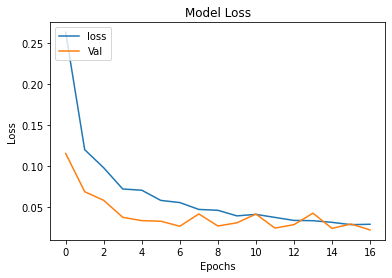

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

## 42 - Avaliando (Acuracia = Acerto)

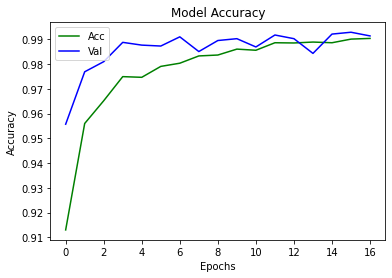

In [ ]:
plt.plot(history.history['accuracy'],'g')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')